In [37]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt 
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
X=x_test

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [39]:
names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle','bicycle',
     'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel','can',
     'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster','house', 
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose','sea', 
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm' ]

In [40]:
y_train[46]


array([11])

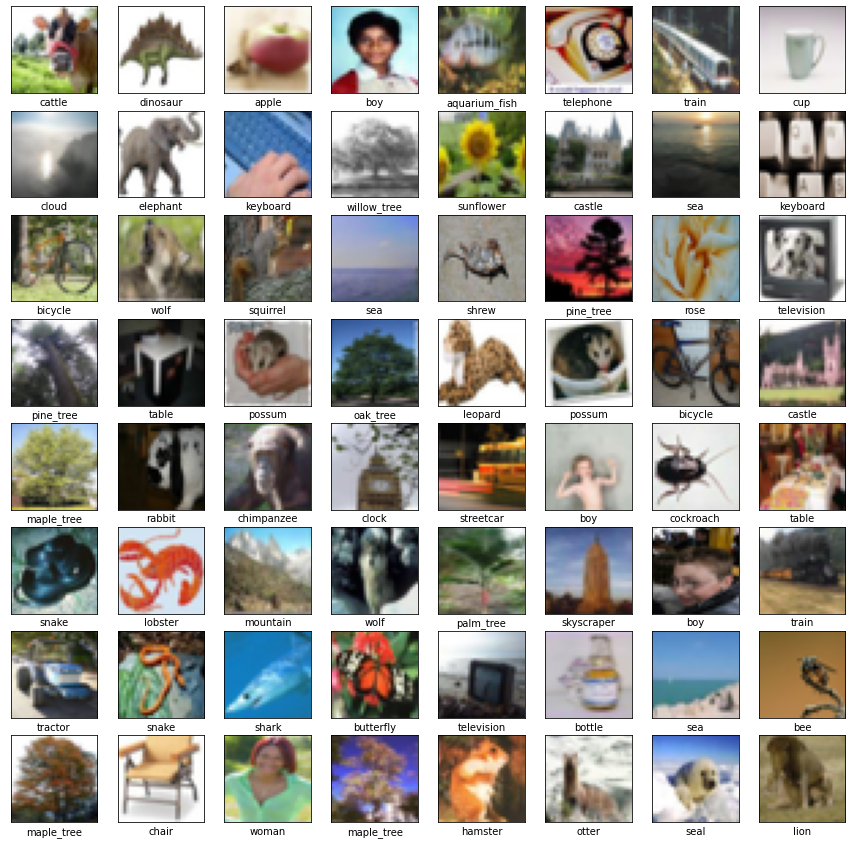

In [41]:
plt.figure(figsize=(15,15))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  yt=y_train[i]
  plt.xlabel(names[(yt[0])])
 # plt.xlabel(y_train[i])
plt.show()

In [42]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_test/=255
x_train/=255

In [43]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,100)    # 10 lớp
y_test=to_categorical(y_test,100)

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


In [45]:
from keras.models import  Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras import datasets, layers, models


In [46]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(32,32,3)))
#model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))

In [47]:
#compiling the model..
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
from keras.backend import categorical_crossentropy
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# train  epochs nhiều sẽ bi vọt lố

In [48]:
history=model.fit(x_train,y_train,epochs=100, batch_size=128,validation_data=(x_test,y_test),verbose=1)   #validation_data xac thưc dữ liệu

Epoch 1/100
391/391 [==============================] - 7s 15ms/step - loss: 4.1474 - accuracy: 0.0697 - val_loss: 3.6513 - val_accuracy: 0.1475
Epoch 2/100
391/391 [==============================] - 5s 14ms/step - loss: 3.4264 - accuracy: 0.1882 - val_loss: 3.1219 - val_accuracy: 0.2429
Epoch 3/100
391/391 [==============================] - 6s 15ms/step - loss: 2.9894 - accuracy: 0.2636 - val_loss: 2.8055 - val_accuracy: 0.3053
Epoch 4/100
391/391 [==============================] - 6s 15ms/step - loss: 2.6665 - accuracy: 0.3306 - val_loss: 2.6599 - val_accuracy: 0.3352
Epoch 5/100
391/391 [==============================] - 6s 14ms/step - loss: 2.3911 - accuracy: 0.3852 - val_loss: 2.5075 - val_accuracy: 0.3720
Epoch 6/100
391/391 [==============================] - 5s 14ms/step - loss: 2.1344 - accuracy: 0.4421 - val_loss: 2.4522 - val_accuracy: 0.3874
Epoch 7/100
391/391 [==============================] - 5s 14ms/step - loss: 1.9009 - accuracy: 0.4904 - val_loss: 2.3627 - val_accuracy:

In [51]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/Colab Notebooks/model_CNN_cifar100.h5')
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/model_CNN_weights_mnist.h5')

from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/model_CNN_cifar100.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


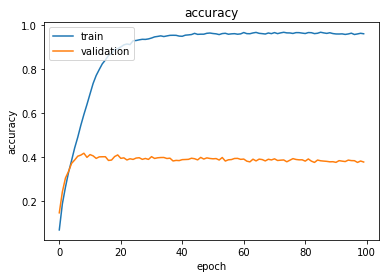

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

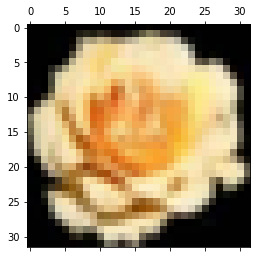

In [53]:
plt.matshow(X[20])

In [55]:
import numpy as np
y_predicted = model.predict(x_test)
print(names[np.argmax(y_predicted[20])])

rose


In [57]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f'test_acc: {test_acc*100}') 

test_acc: 37.81999945640564


In [58]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[30, 74, 55, 51, 71, 14, 97, 26, 49, 0, 92, 75, 13, 69, 40]

In [ ]:
#plt.figure(figsize=(15,15))
#for i in range(64):
 # plt.subplot(8,8,i+1)
 # plt.xticks([])
 # plt.yticks([])
 # plt.grid(False)
 # plt.imshow(x_train[i])

 # plt.xlabel(y_predicted_labels[i])
#plt.show()

# mẫu thử ngoài

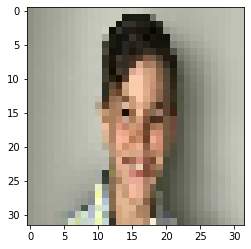

In [65]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('boys.jpeg',target_size=(32,32,3))
plt.imshow(img)

In [66]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
import numpy as np
print(names[np.argmax(model.predict(img))])

man
